In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


[223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 19, 20, 21, 22, 34, 35, 36, 37, 87, 88, 89, 90] total 24
Calculating CI for exp 223
Calculating CI for exp 224
Calculating CI for exp 225
Calculating CI for exp 226
Calculating CI for exp 227
Calculating CI for exp 228
Calculating CI for exp 229
Calculating CI for exp 230
Calculating CI for exp 231
Calculating CI for exp 232
Calculating CI for exp 233
Calculating CI for exp 234
Calculating CI for exp 19
Calculating CI for exp 20
Calculating CI for exp 21
Calculating CI for exp 22
percent has 12000 values
unlab has 12000 values
feats has 12000 values
Accuracy has 12000 values
Composer has 12000 values
folds has 12000 values


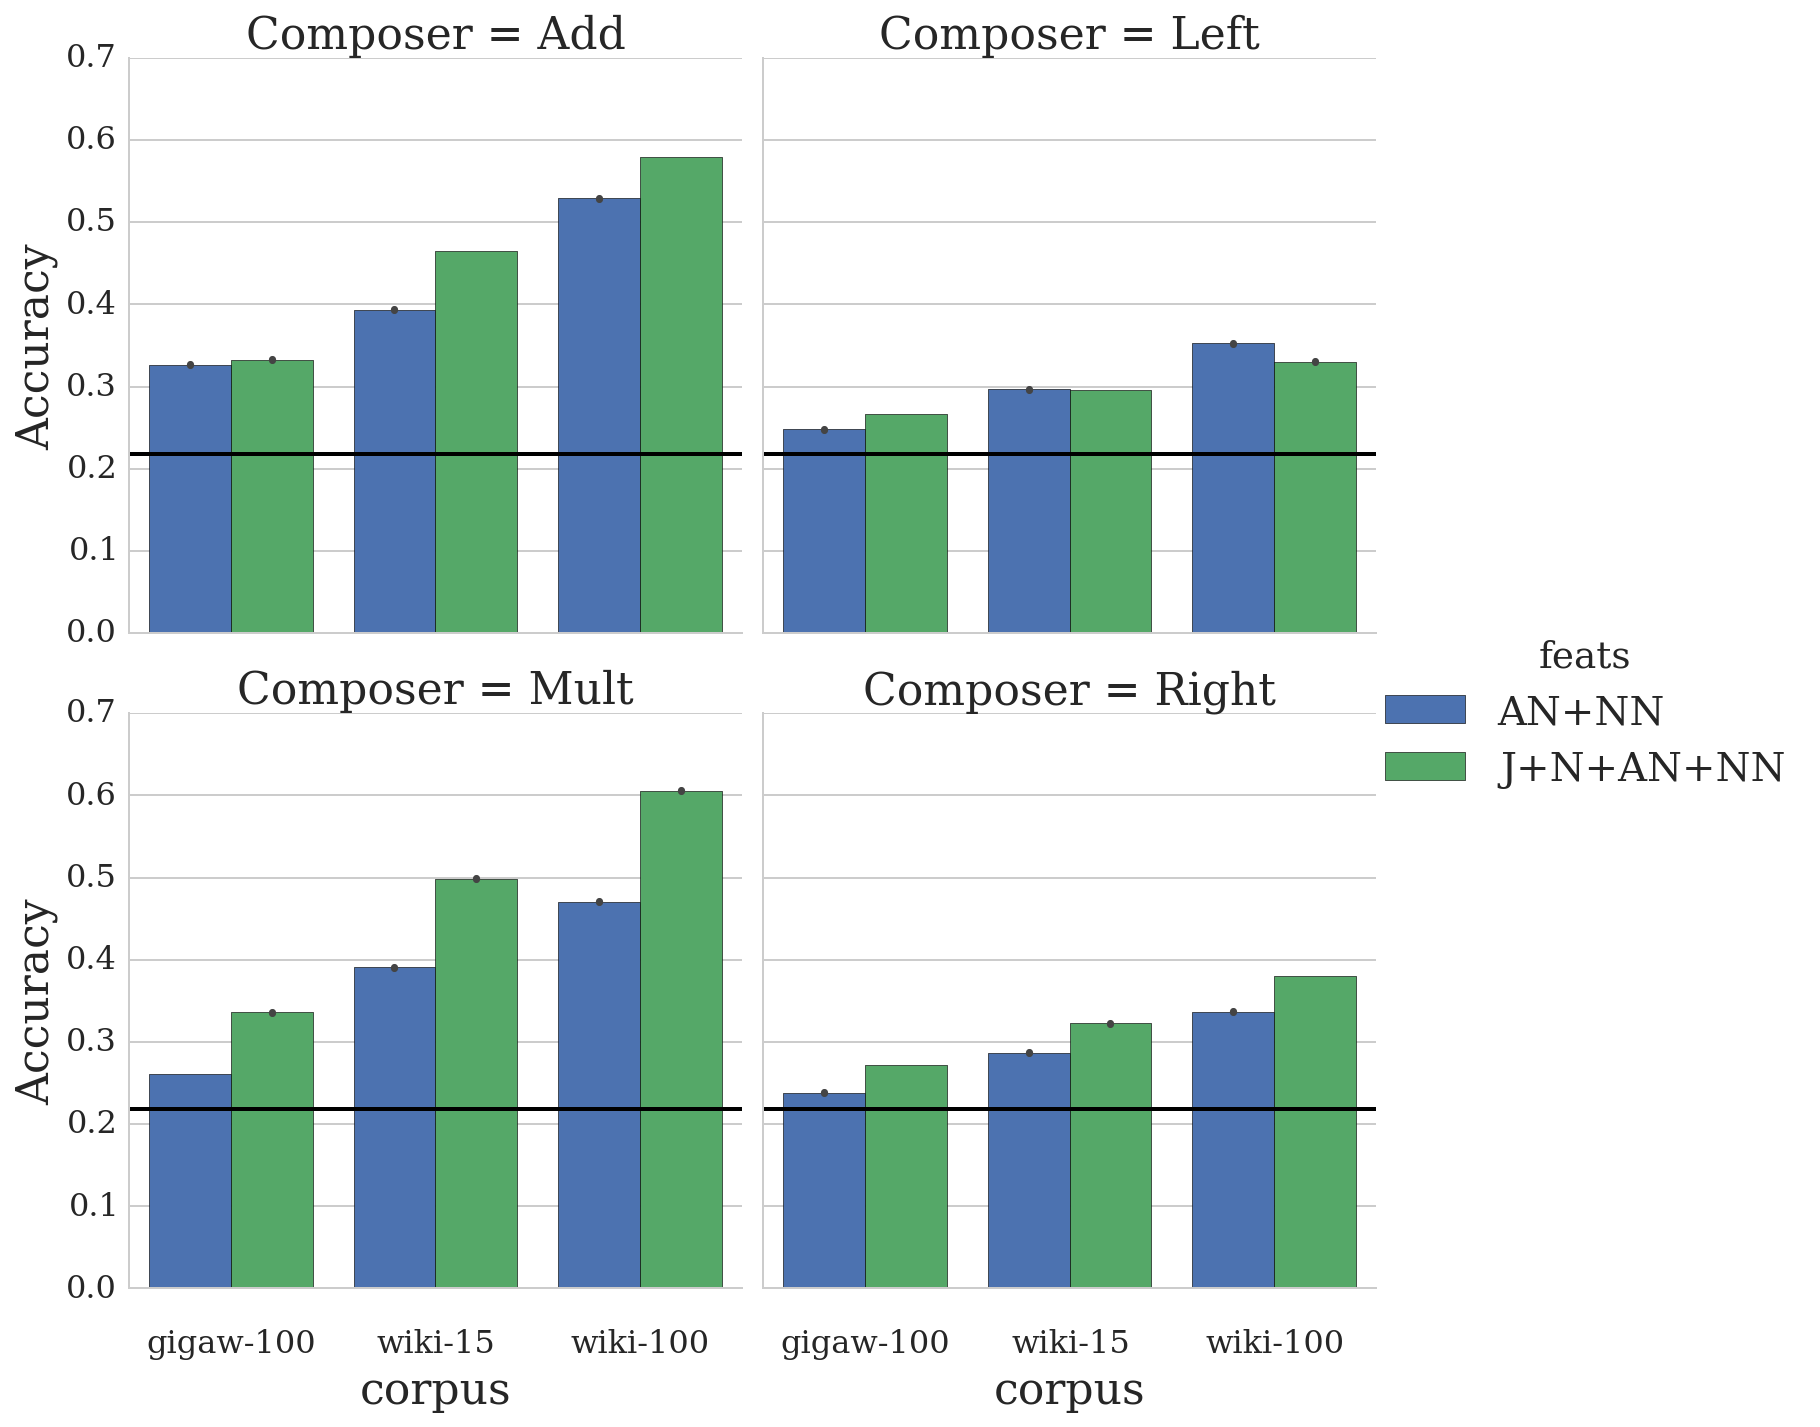

In [2]:
%autoreload
# settings_of(153)
s = {'document_features_ev': 'J+N+AN+NN',
     'document_features_tr': 'J+N+AN+NN',
     'expansions__allow_overlap': 0,
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__entries_of_id': None,
     'expansions__k': 3,
     'expansions__neighbour_strategy': 'linear',
     'expansions__noise': 0.0,
     'expansions__use_random_neighbours': 0,
     'expansions__use_similarity': 0,
     'expansions__vectors__algorithm': 'word2vec',
#      'expansions__vectors__composer': 'Add',
     'expansions__vectors__dimensionality': 100,
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled__in': ['gigaw', 'wiki'],
     'expansions__vectors__unlabelled_percentage__in': [15, 100],
     'labelled': 'amazon_grouped-tagged'}
ids = list(Experiment.objects.filter(**s).values_list('id', flat=True))
s['document_features_ev'] = 'AN+NN'
ids += list(Experiment.objects.filter(**s).values_list('id', flat=True))
# s['document_features_ev'] = 'AN'
# ids += list(Experiment.objects.filter(**s).values_list('id', flat=True))
# s['document_features_ev'] = 'NN'
# ids += list(Experiment.objects.filter(**s).values_list('id', flat=True))
print(ids, 'total', len(ids))

fields = {  'unlab': 'expansions__vectors__unlabelled',
            'percent': 'expansions__vectors__unlabelled_percentage',
            'Composer': 'expansions__vectors__composer',
            'feats': 'document_features_ev'}
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
g= sns.factorplot(y='Accuracy', x='corpus', col='Composer', hue='feats', 
                   x_order=sort_df_by(df, 'corpus'),
                   col_wrap=2,
                   data=df, kind='bar');

for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
plt.savefig('plot-nps-at-decode-time.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)